## Jupyter notebook for plotting PCA of RNA-seq time course data

This notebook is used to plot the PCA result of RNA-seq time couse data used in the paper **\"Analysis of chromatin organinization and gene expression in T cells identifies functional genes for rheumatoid arthritis\"** by *Jing Yang, Amanda McGovern, Paul Martin, Kate Duffus, Xiangyu Ge, Peyman Zarrineh, Andrew P Morris, Antony Adamson, Peter Fraser, Magnus Rattray & Stephen Eyre*

Author : *Jing Yang*  <br />
Date: 01-05-2019 <br />
For any questions about the code, please drop me a line at Jing.Yang@manchester.ac.uk

In [1]:
library(tidyverse)
library(scales)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.1     ✔ purrr   0.3.4
✔ tibble  3.0.1     ✔ dplyr   1.0.0
✔ tidyr   1.1.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




In [2]:
rnaseq_data <- read.csv('data/gene_normalized.csv', header=T)

In [3]:
dim(rnaseq_data)

[1] 22126    16

In [4]:
head(rnaseq_data)

,ENSG,chr,ENSGStart,ENSGEnd,T01,T201,T601,T2H1,T4H1,T24H1,T02,T202,T602,T2H2,T4H2,T24H2
,<fct>,<fct>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ENSG00000000003,chrX,100627109,100639991,5.041981,5.062369,4.178733,3.377680,1.986341,5.324410,5.177855,3.688929,3.295454,5.253633,4.226941,4.335357
2,ENSG00000000419,chr20,50934867,50958555,10.556373,11.059740,10.784106,10.332645,10.273519,10.419062,11.032946,11.032608,10.768947,10.781390,10.590316,10.778582
3,ENSG00000000457,chr1,169849631,169894267,8.074191,7.582473,9.025557,9.324986,9.353563,9.026321,7.985902,8.162494,9.417072,9.456439,9.271116,8.889596
4,ENSG00000000460,chr1,169662007,169854080,9.029226,8.655751,9.993021,12.866744,14.215491,10.871978,8.287388,8.345116,10.056483,11.656388,13.905748,11.378513
5,ENSG00000000938,chr1,27612064,27635277,9.680082,9.113586,9.108392,9.024590,9.395413,7.303896,5.479472,5.918468,5.355478,4.750553,5.187896,2.535247
6,ENSG00000000971,chr1,196651878,196747504,6.360314,5.424491,5.394533,5.269632,4.710372,4.385639,5.551854,5.941924,5.636894,5.042941,4.976733,4.017008


In [5]:
idx0 <- c('T0','T20','T60','T2H','T4H','T24H')
idx1 <- paste(idx0, '1', sep='')
idx2 <- paste(idx0, '2', sep='')
idx3 <- paste(idx0, '3', sep='')

time0 <- c('0 min','20 mins','1 hrs', '2 hrs',' 4 hrs', '24 hrs')


### plot the peaks and FRAP scrore for ATAC-seq data

In [6]:

rnaseq_dataonly <- rnaseq_data[,c(idx1,idx2)]

In [7]:
head(rnaseq_dataonly)


,T01,T201,T601,T2H1,T4H1,T24H1,T02,T202,T602,T2H2,T4H2,T24H2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,5.041981,5.062369,4.178733,3.377680,1.986341,5.324410,5.177855,3.688929,3.295454,5.253633,4.226941,4.335357
2,10.556373,11.059740,10.784106,10.332645,10.273519,10.419062,11.032946,11.032608,10.768947,10.781390,10.590316,10.778582
3,8.074191,7.582473,9.025557,9.324986,9.353563,9.026321,7.985902,8.162494,9.417072,9.456439,9.271116,8.889596
4,9.029226,8.655751,9.993021,12.866744,14.215491,10.871978,8.287388,8.345116,10.056483,11.656388,13.905748,11.378513
5,9.680082,9.113586,9.108392,9.024590,9.395413,7.303896,5.479472,5.918468,5.355478,4.750553,5.187896,2.535247
6,6.360314,5.424491,5.394533,5.269632,4.710372,4.385639,5.551854,5.941924,5.636894,5.042941,4.976733,4.017008


In [8]:

pca_rnaseq <- prcomp(t(rnaseq_dataonly), scale=TRUE, center=TRUE)

In [9]:

pca_rnaseq_forplot <- data.frame(PC1=pca_rnaseq$x['PC1'], PC2=pca_rnaseq$x['PC2'], 
                                  replicate = c(rep(1,6), rep(2,6)), time = c(idx0, idx0))


In [10]:


pca_rnaseq_vars <- apply(pca_rnaseq$x, 2, var)  
pca_rnaseq_props <- pca_rnaseq_vars / sum(pca_rnaseq_vars)
pca_rnaseq_label_PC1 <- round(pca_rnaseq_props[1], digits=2)
pca_rnaseq_label_PC2 <- round(pca_rnaseq_props[2], digits=2)



In [11]:

pca_rnaseq_forplot <- data.frame(PC1=pca_rnaseq$x[,'PC1'], PC2=pca_rnaseq$x[,'PC2'], 
                                label_PC1=paste('PC1', percent(pca_rnaseq_label_PC1)), 
                                 label_PC2=paste('PC2', percent(pca_rnaseq_label_PC2)), 
                                  Replicate = factor(c(rep(1,6), rep(2,6))), Time = factor(c(time0, time0), levels=time0))


In [12]:

pca_rnaseq_forplot$label <- 'All'

pca_rnaseq_forplot$label2 <- 'RNA-seq'



In [13]:

rownames(pca_rnaseq_forplot) <- NULL


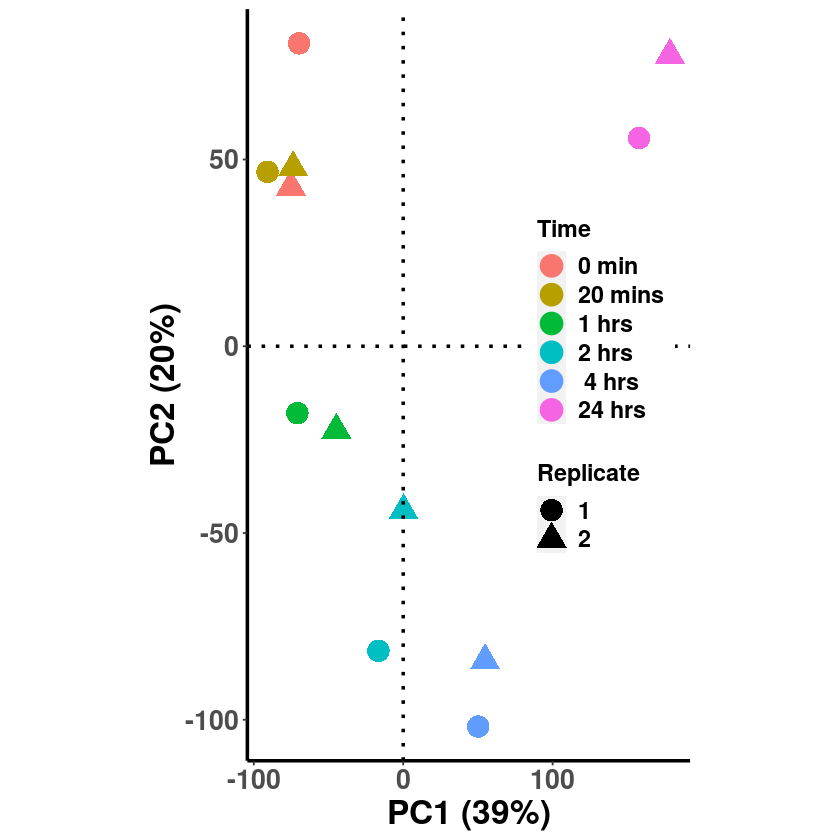

In [14]:
p0 <- ggplot(data=pca_rnaseq_forplot, aes(x=PC1, y=PC2, col=Time)) + geom_point(aes(shape=Replicate), size=6) + 
geom_hline(yintercept=0, linetype='dotted',size=1) + geom_vline(xintercept=0,linetype='dotted',size=1) +
#geom_segment(aes(x=-200,xend=max(PC1), y=-200, yend=-200), linetype='solid', color='black') + 
#geom_segment(aes(x=-200,xend=-200, y=-200, yend=max(PC2)),linetype='solid', color='black')+

#geom_text(aes(x=0, y=min(PC2)-100, label=label_PC1), color='black') +
#geom_text(aes(x=min(PC1)-100, y=0, label=label_PC2), color='black', angle=90) +

    xlab(paste('PC1 ', '(',percent(pca_rnaseq_label_PC1),')', sep='')) + 
    ylab(paste('PC2 ', '(',percent(pca_rnaseq_label_PC2),')', sep='')) +
    labs(c('Time','Replicate')) + 
theme(panel.background=element_blank(),#panel.background=element_rect(fill='white',color='black',linetype=1),  panel.grid.major=element_line(color='grey', size=0.1), 
     axis.line=element_line(size=1),
       text=element_text(size=14, face="bold"),
                 axis.text=element_text(size=16, face='bold'), axis.title=element_text(size=20, face="bold"),
      strip.text.x=element_blank(),strip.text.y=element_blank(), strip.background=element_blank(),legend.text=element_text(size=14), legend.position=c(0.8,0.5)) +
coord_fixed(ratio=2.5) #+ ggtitle('Supplementary Fig. 1d')
 #facet_grid(label2 ~ label)
p0
#ggsave(file='../../../IntegratingATAC-RNA-HiC/Individual_Figures_Files/Gene_expression/RNAseq-PCA.pdf',p0)